# Extra Tree Classifier 

* Extra Tree Classifier is an emsemble algorithm, which uses number of decision trees at the back end and each decision tree is uncorrelated to each other.
* Extra Tree Classifier is also a bootstraping and bagging algorithm.
* Random Forest is a greedy algorithm, uses the best available parameter at each node for the split based on the 'gini' or ' entropy'.
* But in Extra Tree Classifier process of taking parameter is purely random.
* Extra Tree Classifier uses all the records of the sample.

## Credit Risk Dataset

In [1]:
# importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("C:/Users/vishw/OneDrive/Documents/Imarticus/Python/Machine Learning")

In [3]:
cr = pd.read_csv("CreditRisk.csv")

In [5]:
# printing first 5 records
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# printing shape of the dataset
cr.shape   # data has 981 rows and 13 columns

(981, 13)

In [7]:
# checking for null if there are any

cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [177]:
# taking care of NULL's
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("Yes")
cr.Self_Employed = cr.Self_Employed.fillna("Yes")
cr.Credit_History = cr.Credit_History.fillna(1)
cr.Dependents = cr.Dependents.fillna(0)
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(), inplace = True)

In [178]:
# checking the NULL's
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [179]:
# To perform Extra Tree Classifier we have to convert categorical in numbers

cr.Gender.replace({"Male" : 1, "Female": 0}, inplace = True)
cr.Married.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Education.replace({"Graduate": 1, "Not Graduate": 0}, inplace = True)
cr.Self_Employed.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Property_Area.replace({"Semiurban":1, "Urban": 2, "Rural":3}, inplace = True)
cr.Loan_Status.replace({"Y": 1, "N": 0}, inplace = True)

In [180]:
# let's separate the data with sampling with x and y

cr_x = cr.iloc[: , 1:12]  # taking all the rows and column except loan id and target variable 
cr_y = cr.iloc[: , -1] # storing only y variable

In [181]:
# here splitting the database in train x and y and test x and y
from sklearn.model_selection import train_test_split

cr_x_train, cr_x_test, cr_y_train, cr_y_test = train_test_split(cr_x, cr_y, test_size = .2)

In [182]:
# importing Extra Tree Classifier from Sklearn.ensemble

from sklearn.ensemble import ExtraTreesClassifier

In [183]:
# storing extra tree classifier in 'etc'

etc = ExtraTreesClassifier(criterion = "entropy", max_depth = 2)

In [184]:
# fiting the train data in 'etc.fit'

etc.fit(cr_x_train, cr_y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=2)

In [196]:
# fitting cr_x_test in the etc.predict

pred_etc = etc.predict(cr_x_test)

In [197]:
# building confusin matrix and printing the results

from sklearn.metrics import confusion_matrix
confusion_matrix(cr_y_test, pred_etc)

array([[ 29,  25],
       [  1, 142]], dtype=int64)

In [202]:
# printing the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(cr_y_test, pred_etc)

0.868020304568528

In [203]:
from sklearn.metrics import recall_score
recall_score(cr_y_test, pred_etc)

0.993006993006993

In [ ]:
from sklearn.metrics import recall_score
recall_score(cr_y_test, pred_etc)

In [158]:
# to find which feature is important we are using featur_importances here

etc.feature_importances_

array([0.01324634, 0.09397285, 0.01455625, 0.05720639, 0.00578991,
       0.00882992, 0.04951586, 0.01851055, 0.03906938, 0.5359914 ,
       0.16331115])

In [159]:
# identifying which feature importances score belongs to which columns
feature_importance = pd.DataFrame({"Features": cr_x_train.columns, "Score": etc.feature_importances_})
feature_importance

,Features,Score
0,Gender,0.013246
1,Married,0.093973
2,Dependents,0.014556
3,Education,0.057206
4,Self_Employed,0.005790
5,ApplicantIncome,0.008830
6,CoapplicantIncome,0.049516
7,LoanAmount,0.018511
8,Loan_Amount_Term,0.039069
9,Credit_History,0.535991


In [160]:
# printing the highest feature importance at the first followed by 2nd most and 3rd
feature_importance = feature_importance.sort_values("Score", ascending = False)
feature_importance

,Features,Score
9,Credit_History,0.535991
10,Property_Area,0.163311
1,Married,0.093973
3,Education,0.057206
6,CoapplicantIncome,0.049516
8,Loan_Amount_Term,0.039069
7,LoanAmount,0.018511
2,Dependents,0.014556
0,Gender,0.013246
5,ApplicantIncome,0.008830


Text(0.5, 1.0, 'Feature Importance on Credit Risk Data')

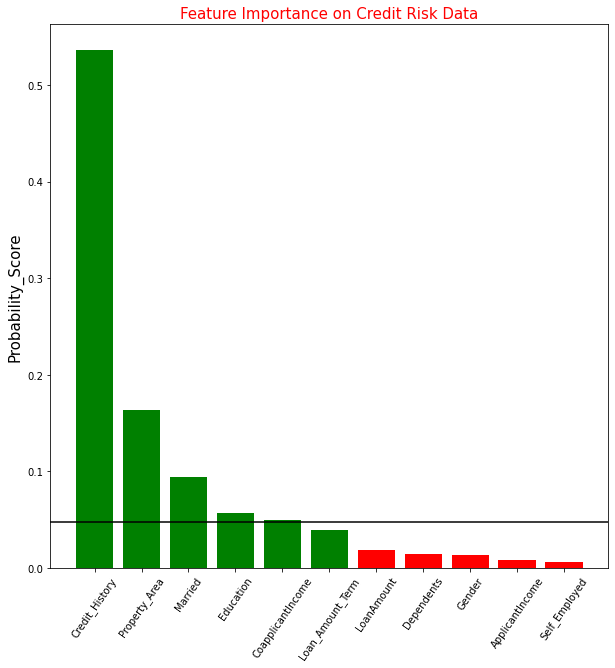

In [161]:
# to make it understandable here plotting the graph

plt.figure(figsize = (10,10))
plt.bar(feature_importance.Features, feature_importance.Score, color = ["g", "g", "g", "g", "g", "g", "r", "r", "r", "r", "r"])
plt.axhline(y = .048, color = "black")
y_pos = range(len(feature_importance.Features))
plt.ylabel("Probability_Score", size = 15)
plt.xticks(y_pos, feature_importance.Features, rotation = 55);
plt.title("Feature Importance on Credit Risk Data", size = 15, color = "r")

In [162]:
# here plotting the tree with necessary libraries import

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [163]:
cr_x_train_names = cr_x_train.columns

In [164]:
# verifying the data in the x_train

cr_x_train.shape

(784, 11)

In [165]:
dot_data = StringIO()

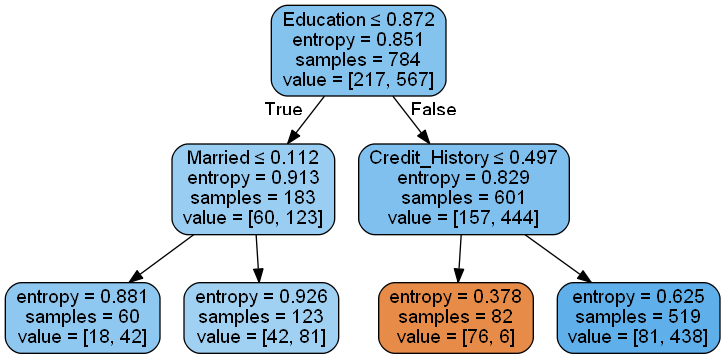

<Figure size 864x864 with 0 Axes>

In [166]:
# plotting the tree

fig = plt.figure(figsize= (12,12))

export_graphviz(etc[1], out_file= dot_data,
               filled=True, rounded= True,
               special_characters= True, feature_names = cr_x_train_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Comparing Extra Tree Classifier with Random Forest

In [39]:
# to compare 'Extra Tree Classifier' with 'Random Forest'

from sklearn.ensemble import RandomForestClassifier

In [46]:
rnf = RandomForestClassifier(criterion = "entropy")

In [47]:
rnf.fit(cr_x_train, cr_y_train) 

RandomForestClassifier(criterion='entropy')

In [48]:
pred_rnf = rnf.predict(cr_x_test)

In [49]:
confusion_matrix(cr_y_test, pred_rnf)

array([[ 27,  28],
       [  4, 138]], dtype=int64)

In [50]:
accuracy_score(cr_y_test, pred_rnf)

0.8375634517766497

In [168]:
from sklearn.metrics import recall_score
recall_score(cr_y_test, pred_rnf)

0.8620689655172413

# Intepretation :

### Given the accuracy and confusion matrix of the both algorithm we can conclude that the Extra Tree Classifier is giving better results.